# Binary Search Trees, Traversals and Balancing in Python

### Part 2 of "Data Structures and Algorithms in Python"

![](https://i.imgur.com/lVqP63n.png)





[Data Structures and Algorithms in Python](https://jovian.ai/learn/data-structures-and-algorithms-in-python) is a beginner-friendly introduction to common data structures (linked lists, stacks, queues, graphs) and algorithms (search, sorting, recursion, dynamic programming) in Python, designed to help you prepare for coding interviews and assessments.


Earn a verified certificate of accomplishment for this course by signing up here: http://pythondsa.com.

Ask questions, get help & participate in discussions on the community forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

## Problem 


In this notebook, we'll focus on solving the following problem:

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. **Insert** the profile information for a new user.
> 2. **Find** the profile information of a user, given their username
> 3. **Update** the profile information of a user, given their usrname
> 5. **List** all the users of the platform, sorted by username
>
> You can assume that usernames are unique. 

Along the way, we will also solve several other questions related to binary trees and binary search trees that are often asked in coding interviews and assessments. 

## The Method


Here's a systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.


## 1. State the problem clearly. Identify the input & output formats.

#### Problem

> We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.

#### Input

The key inputs to our data structure are user profiles, which contain the username, name and email of a user. 

A Python _class_ would be a great way to represent the information for a user. A class is a blueprint for creating _objects_. Everything in Python is an _object_ belonging to some _class_. Here's the simples possible class in Python, with nothing in it:

The object `user1` does not contain any useful information. Let's add a _constructor method_ to the class to store some _attributes_ or _properties_.

In [1]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('User Created')

In [2]:
user2 = User('john', 'John Doe', 'johndoe@gmail.com')

User Created


In [3]:
user2.username, user2.name, user2.email

('john', 'John Doe', 'johndoe@gmail.com')

In [4]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        
    def __repr__(self):
        return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)
    
    def __str__(self):
        return self.__repr__()

In [5]:
user3 = User('jane', 'Jane Doe', 'jane@doe.com')

In [6]:
user3

User(username='jane', name='Jane Doe', email='jane@doe.com')

#### Output

We can also express our desired data structure as a Python class `UserDatabase` with four methods: `insert`, `find`, `update` and `list_all`. 

In [7]:
class UserDatabase:
    def insert(self, user):
        pass
    
    def find(self, username):
        pass
    
    def update(self, user):
        pass
        
    def list_all(self):
        pass

## 2. Come up with some example inputs & outputs. 

Let's create some sample user profiles that we can use to test our functions once we implement them.

In [8]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')
tabish = User('tabish', 'Tabish Shaikh', 'tabishshaikh764@gmail.com')

In [9]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal,tabish]

Since we haven't implemented our data structure yet, it's not possible to list sample outputs. However you can try to come up with different scenarios to test future implementations

Exercise: List some scenarios for testing the class methods insert, find, update and list_all.

## 3. Come up with a correct solution. State it in plain English.

Here's a simple and easy solution to the problem: we store the `User` objects in a list sorted by usernames. 

The various functions can be implemented as follows:

1. **Insert**: Loop through the list and add the new user at a position that keeps the list sorted.
2. **Find**: Loop through the list and find the user object with the username matching the query.
3. **Update**: Loop through the list, find the user object matching the query and update the details
4. **List**: Return the list of user objects.

We can use the fact usernames, which are are strings can be compared using the `<`, `>` and `==` operators in Python.

## 4. Implement the solution and test it using example inputs.

The code for implementing the above solution is also fairly straightfoward.

In [10]:
class UserDatabase:
    def __init__(self):
        self.users = []
    
    def insert(self, user):
        i = 0
        while i < len(self.users):
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)
    
    def find(self, username):
        for user in users:
            if user.username == username:
                return user
    
    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email
        
    def list_all(self):
        return self.users

We can create a new database of users by _instantiating_ and object of the `UserDatabase` class.

In [11]:
database = UserDatabase()

Let's insert some entires into the object.

In [12]:
database.insert(hemanth)
database.insert(aakash)
database.insert(siddhant)

In [13]:
user = database.find('siddhant')
user

User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com')

In [14]:
database.update(User(username='siddhant', name='Siddhant U', email='siddhant@examp.com'))
user

User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')

In [15]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')]

In [16]:
database.insert(biraj)

In [17]:
database.list_all()

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')]

## 5. Analyze the algorithm's complexity and identify inefficiencies

The operations `insert`, `find`, `update` involves iterating over a list of users, in the worst case, they may take up to `N` iterations to return a result, where `N` is the total number of users. `list_all` however, simply returns the existing internal list of users. 

Thus, the time complexities of the various operations are:

1. Insert: **O(N)**
2. Find: **O(N)**
3. Update: **O(N)**
4. List: **O(1)**

**Exercise:** Verify that the space complexity of each operation is **O(1)**.

Is this good enough? To get a sense how long each function might take if there are 100 million users on the platform, we can simply run an `for` or `while` loop on 10 million numbers.

In [18]:
# %%time
# for i in range(100000000):
#     j = i*i

It takes almost 10 seconds to execute all the iterations in the above cell. 

* A 10-second delay for fetching user profiles will lead to a suboptimal users experience and may cause many users to stop using the platform altogether. 
* The 10-second processing time for each profile request will also significantly limit the number of users that can access the platform at a time or increase the cloud infrastructure costs for the company by millions of dollars.

As a senior backend engineer, you must come up with a more efficient data structure! Choosing the right data structure for the requirements at hand is an important skill. It's apparent that a sorted list of users might not be the best data structure to organize profile information for millions of users. 

## 6. Apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree**:

<img src="https://i.imgur.com/lVqP63n.png" width="520">



It's called a tree because it vaguely like an inverted tree trunk with branches. 
* The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right). 
* Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
* The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

<img src="https://i.imgur.com/TZHMKJr.png" width="400">

## Balanced Binary Search Trees

<img src="https://i.imgur.com/Mqef5b3.png" width="520">

For our use case, we require the binary tree to have some additional properties:

1. **Keys and Values**: Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
2. **Binary Search Tree**: The *left subtree* of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the *right subtree* of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balanced Tree**: The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level. 

For a tree of height `k`, here's a list of the number of nodes at each level:

Level 0: `1`

Level 1: `2`

Level 2: `4` i.e. `2^2`

Level 3: `8` i.e. `2^3`

...

Level k-1: `2^(k-1)`

If the total number of nodes in the tree is `N`, then it follows that

```
N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
```


We can simplify this equation by adding `1` on each side:

```
N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

...

N + 1 = 2^(k-1) + 2^(k-1)

N + 1 = 2^k

k = log(N + 1) <= log(N) + 1 

```

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root. 

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

## Binary Tree

> **QUESTION 2**: Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple binary tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

Here's a simple class representing a node within a binary tree.

In [19]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [20]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

In [21]:
node0.key

3

In [22]:
node0.left = node1
node0.right = node2

And we're done! We can create a new variable *tree* which simply points to the root node, and use it to access all the nodes within the tree.

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

In [23]:
tree = node0

In [24]:
tree.key

3

In [25]:
tree.left.key

4

In [26]:
tree.right.key

5

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

**Exercise:** Create the following binary tree using the `TreeNode` class defined above.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [27]:
root = TreeNode(2)
root.left = TreeNode(3)
root.left.left = TreeNode(1)

In [28]:
print(root.key, root.left.key, root.left.left.key)

2 3 1


In [29]:
root.right = TreeNode(5)
root.right.left = TreeNode(3)
root.right.left.right = TreeNode(4)

root.right.right = TreeNode(7)
root.right.right.left = TreeNode(6)
root.right.right.right = TreeNode(8)

In [30]:
root.right.right.right.key

8

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `( left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themselves tuples) into binary tree.

Here's an tuple representing the tree shown above:

In [31]:
tree_tuple = ((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [32]:
def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

The `parse_tuple` creates a new root node when a tuple of size 3 as an the input. Interestingly, to create the left and right subtrees for the node, the `parse_tuple` function invokes itself. This technique is called _recursion_. The chain of _recursive_ calls ends when `parse_tuple` encounters a number or `None` as input. We'll use recursion extensively throughout this tutorial.


**Exercise:** Add print statements inside `parse_tuple` to display the arguments for each call of the function. Does the sequence of recursive calls make sense to you?

In [33]:
tree2 = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))

We can now examine the tree to verify that it was constructed as expected.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [34]:
tree2.key

2

In [35]:
tree2.left.key, tree2.right.key

(3, 5)

In [36]:
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key

(1, None, 3, 7)

**Exercise:** Define a function `tree_to_tuple` that converts a binary tree into a tuple representing the same tree. E.g. `tree_to_tuple` converts the tree created above to the tuple `((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))`. *Hint*: Use recursion.

In [37]:
def tree_to_tuple(node):
    
    if isinstance(node, TreeNode):
        if node.left is None and node.right is  None:
            return node.key
        
        return (tree_to_tuple(node.left), node.key, tree_to_tuple(node.right))
    else:
        return node

In [38]:
tupledTree = tree_to_tuple(tree2)

In [39]:
tupledTree

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [40]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left,space, level+1)    

In [41]:
display_keys(tree2, '    ')

            8
        7
            6
    5
            4
        3
            ∅
2
        ∅
    3
        1


We can now visualize the tree that was just created (albeit rotated by 90 degrees). It's easy to see that it matches the expected structure.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

**Exercise**: Create some more trees and visualize them using `display_keys`. You can use [excalidraw.com](https://excalidraw.com) as a digital whiteboard to create trees.

## Traversing a Binary Tree

The following questions are frequently asked in coding interviews and assessments:

> **QUESTION 3**: Write a function to perform the _inorder_ traversal of a binary tree.

> **QUESTION 4**: Write a function to perform the _preorder_ traversal of a binary tree.

> **QUESTION 5**: Write a function to perform the _postorder_ traversal of a binary tree.

A *traversal* refers to the process of visiting each node of a tree exactly once. _Visiting a node_ generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys: 

### Inorder traversal



  1. Traverse the left subtree recursively inorder.
  2. Traverse the current node.
  3. Traverse the right subtree recursively inorder.


<img src="https://i.imgur.com/KCXpMA9.png" width="540">


### Preorder traversal

  1. Traverse the current node.
  2. Traverse the left subtree recursively preorder.
  3. Traverse the right subtree recursively preorder.
  
<img src="https://i.imgur.com/2xrMUWP.png" width="540">


Can you guess how **postorder** traversal works??


Here's an implementation of inorder traversal of a binary tree.

In [42]:
def traverse_in_order(node):
    if node is None: 
        return []
    return(traverse_in_order(node.left) + 
           [node.key] + 
           traverse_in_order(node.right))

In [43]:
tree = parse_tuple(((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [44]:
traverse_in_order(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

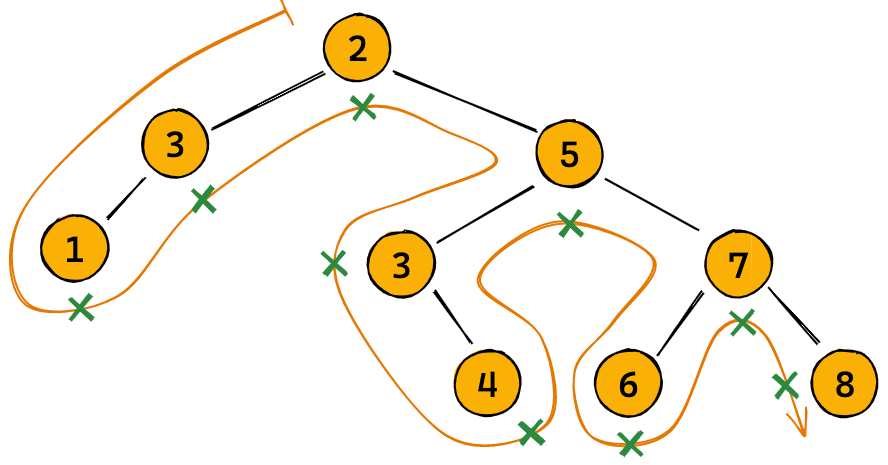

In [45]:
def postorder(node):
    if node is None:
        return []
    return (postorder(node.right) + [node.key] + postorder(node.left))

## Height and Size of a Binary Tree


> **QUESTION 6**: Write a function to calculate the height/depth of a binary tree

> **QUESTION 7**: Write a function to count the number of nodes in a binary tree


The _height/depth_ of a binary tree is defined as the length of the longest path from its root node to a leaf. It can be computed recursively, as follows:

Let's compute the height of this tree:

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [46]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [47]:
tree_height(tree)

4

In [48]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [49]:
tree_size(tree)

9

In [50]:
        def maxdep(node):
            if node is None:
                return 0
            
            left_dep = maxdep(node.left)
            right_dep = maxdep(node.right) 
    
            return max(left_dep, right_dep) + 1
    
        def mindep(node):
            if node is None:
                return 0
            if node.left == None and node.right == None:
                return 1
            
            if node.left is None:
                return mindep(node.right) +1
            if node.right is None:
                return mindep(node.left) +1
            
            left_dep = mindep(node.left) 
            right_dep = mindep(node.right)
    
            return min(left_dep, right_dep) + 1
        
        def dia(node):
            if node is None:
                return 0
            
            lmax = maxdep(node.left)
            rmax = maxdep(node.right)
            ldia = dia(node.left)
            rdia = dia(node.right)
            
            return max(lmax + rmax + 1, max(ldia, rdia))
            

In [51]:
testcase = parse_tuple((((4),2,None),1,(5)))
testcase2 = parse_tuple((((4),2,(5)),1,(3)))
testcase3 = parse_tuple(((2),1,None))
testcase4 = parse_tuple(((3,1,None),2,(5,4,None)))
testcase5 = parse_tuple(((1,3,None),2,None))

In [52]:
nodename = testcase5

print(dia(nodename))
print('---------------------')
display_keys(nodename, '    ')

3
---------------------
    ∅
2
        ∅
    3
        1


As a final step, let's compile all the functions we've written so far as methods withing the `TreeNode` class itself. Encapsulation of data and functionality within the same class is a good programming practice.

In [53]:
class TreeNode():
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)

    def traverse_in_order(self):
        if self is None: 
            return []
        return (TreeNode.traverse_in_order(self.left) + 
                [self.key] + 
                TreeNode.traverse_in_order(self.right))
    
    def display_keys(self, space='\t', level=0):
        # If the node is empty
        if self is None:
            print(space*level + '∅')
            return   

        # If the node is a leaf 
        if self.left is None and self.right is None:
            print(space*level + str(self.key))
            return

        # If the node has children
        display_keys(self.right, space, level+1)
        print(space*level + str(self.key))
        display_keys(self.left,space, level+1)    
    
    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left),  self.key, TreeNode.to_tuple(self.right)
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def __repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    @staticmethod    
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node

## Binary Search Tree (BST)

A binary search tree or BST is a binary tree that satisfies the following conditions:

1. The left subtree of any node only contains nodes with keys less than the node's key
2. The right subtree of any node only contains nodes with keys greater than the node's key

It follows from the above conditions that every subtree of a binary search tree must also be a binary search tree.


> **QUESTION 8**: Write a function to check if a binary tree is a binary search tree (BST).

> **QUESTION 9**: Write a function to find the maximum key in a binary tree.

> **QUESTION 10**: Write a function to find the minimum key in a binary tree.


Here's a function that covers all of the above:

In [54]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(node.left)
    is_bst_r, min_r, max_r = is_bst(node.right)
    
    is_bst_node = (is_bst_l and is_bst_r and 
              (max_l is None or node.key > max_l) and 
              (min_r is None or node.key < min_r))
    
    min_key = min(remove_none([min_l, node.key, min_r]))
    max_key = max(remove_none([max_l, node.key, max_r]))
    
    # print(node.key, min_key, max_key, is_bst_node)
        
    return is_bst_node, min_key, max_key

The following tree is not a BST (because a node with the key 3 appears in the left subtree of a node with the key 2):

<img src="https://i.imgur.com/d7djJAf.png" width="540">

Let's verify this using `is_bst`.

In [55]:
tree1 = TreeNode.parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))
is_bst(tree1)

(False, 1, 8)

On the other hand, the following tree is a BST:

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

Let's create this tree and verify that it is a BST. Note that the `TreeNode` class also supports using strings as keys, as strings support the comparison operators `<` and `>` too.

In [56]:
tree2 = TreeNode.parse_tuple((('aakash', 'biraj', 'hemanth')  , 'jadhesh', ('siddhant', 'sonaksh', 'vihsal')))
is_bst(tree2)

(True, 'aakash', 'vihsal')

## Storing Key-Value Pairs using BSTs

Recall that we need to store user objects with each key in our BST. Let's define new class `BSTNode` to represent the nodes of of our tree. Apart from having properties `key`, `left` and `right`, we'll also store a `value` and pointer to the parent node (for easier upward traversal).

In [57]:
class BSTNode():
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

Let's try to recreate this BST with usernames as keys and user objects as values:

<img src="https://i.imgur.com/JZeF9ix.png" width="520">

In [58]:
# Level 0
tree = BSTNode(jadhesh.username, jadhesh)
# View Level 0
tree.key, tree.value

('jadhesh',
 User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com'))

In [59]:
# Level 1
tree.left = BSTNode(biraj.username, biraj)
tree.right = BSTNode(sonaksh.username, sonaksh)
tree.left.parent, tree.right.parent = tree, tree

# view level 1
tree.left.key, tree.left.value, tree.right.key, tree.right.value

('biraj',
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 'sonaksh',
 User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com'))

In [60]:
# level 2
tree.left.left = BSTNode(aakash.username, aakash)
tree.left.right = BSTNode(hemanth.username, hemanth)

tree.right.left = BSTNode(siddhant.username, siddhant)
tree.right.right = BSTNode(vishal.username, vishal)

tree.left.left.parent, tree.left.right.parent = tree.left, tree.left
tree.right.left.parent, tree.right.right.parent = tree.right, tree.right

In [61]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


### Insertion into BST


> **QUESTION 11**: Write a function to insert a new node into a BST.


We use the BST-property to perform insertion efficiently: 

1. Starting from the root node, we compare the key to be inserted with the current node's key
2. If the key is smaller, we recursively insert it in the left subtree (if it exists) or attach it as as the left child if no left subtree exists.
3. If the key is larger, we recursively insert it in the right subtree (if it exists) or attach it as as the right child if no right subtree exists.

Here's a recursive implementation of `insert`.

In [62]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

In [63]:
tree = insert(None, jadhesh.username, jadhesh)
insert(tree, biraj.username, biraj)
insert(tree, sonaksh.username, sonaksh)
insert(tree, aakash.username, aakash)
insert(tree, hemanth.username, hemanth)
insert(tree, siddhant.username, siddhant)
insert(tree, vishal.username, siddhant)

In [64]:
display_keys(tree)

		vishal
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


Perfect! The tree was created as expected. 

Note, however, that the order of insertion of nodes change the structure of the resulting tree.

In [65]:
tree2 = insert(None, aakash.username, aakash)
insert(tree2, biraj.username, biraj)
insert(tree2, hemanth.username, hemanth)
insert(tree2, jadhesh.username, jadhesh)
insert(tree2, siddhant.username, siddhant)
insert(tree2, sonaksh.username, sonaksh)
insert(tree2, vishal.username, vishal)

In [66]:
display_keys(tree2)

						vishal
					sonaksh
						∅
				siddhant
					∅
			jadhesh
				∅
		hemanth
			∅
	biraj
		∅
aakash
	∅


Can you see why the tree created above is skewed/unbalanced?

<img src="https://i.imgur.com/lP5Thct.png" width="520">

Skewed/unbalanced BSTs are problematic because the height of such trees often ceases to logarithmic compared to the number of nodes in the tree. For instance the above tree has 7 nodes and height 7.

The length of the path traversed by `insert` is equal to the height of the tree (in the worst case). It follows that if the tree is balanced, the time complexity of insertion is `O(log N)` otherwise it is `O(N)`.

### Finding a Node in BST

> **QUESTION 11**: Find the value associated with a given key in a BST.

We can follow a recursive strategy similar to insertion to find the node with a given key within a BST.

In [67]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

<img src="https://i.imgur.com/dzDszlw.png" width="520">

In [68]:
node = find(tree, 'hemanth')
node.key, node.value

('hemanth',
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'))

### Updating a value in a BST

> **QUESTION 12:** Write a function to update the value associated with a given key within a BST

We can use `find` to locate the node to be updated, and simply update it's value.

In [69]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [70]:
update(tree, 'hemanth', User('hemanth', 'Hemanth J', 'hemanthj@example.com'))

In [71]:
node = find(tree, 'hemanth')
node.value

User(username='hemanth', name='Hemanth J', email='hemanthj@example.com')

### List the nodes

> **QUESTION 13:** Write a function to retrieve all the key-values pairs stored in a BST in the sorted order of keys.

The nodes can be listed in sorted order by performing an inorder traversal of the BST.

In [72]:
def list_all(node):
    if node is None:
        return []
    return list_all(node.left) + [(node.key, node.value)] + list_all(node.right)

In [73]:
list_all(tree)

[('aakash',
  User(username='aakash', name='Aakash Rai', email='aakash@example.com')),
 ('biraj',
  User(username='biraj', name='Biraj Das', email='biraj@example.com')),
 ('hemanth',
  User(username='hemanth', name='Hemanth J', email='hemanthj@example.com')),
 ('jadhesh',
  User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')),
 ('siddhant',
  User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')),
 ('sonaksh',
  User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com')),
 ('vishal',
  User(username='siddhant', name='Siddhant U', email='siddhant@examp.com'))]

## Balanced Binary Trees

> **QUESTION 14**: Write a function to determine if a binary tree is balanced.

Here's a recursive strategy:

1. Ensure that the left subtree is balanced.
2. Ensure that the right subtree is balanced.
3. Ensure that the difference between heights of left subtree and right subtree is not more than 1.


In [74]:
def is_balanced(node):
    if node is None:
        return True, 0
    balanced_l, height_l = is_balanced(node.left)
    balanced_r, height_r = is_balanced(node.right)
    balanced = balanced_l and balanced_r and abs(height_l - height_r) <= 1
    height = 1 + max(height_l, height_r)
    return balanced, height

In [75]:
is_balanced(tree)

(True, 3)

<img src="https://i.imgur.com/lP5Thct.png" width="520">

In [76]:
is_balanced(tree2)

(False, 7)

In [77]:
treet = tree
insert(tree, tabish.username, tabish)

In [78]:
display_keys(treet)

			∅
		vishal
			tabish
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


In [79]:
is_balanced(treet)

(True, 4)

## Balanced Binary Search Trees

> **QUESTION 15**: Write a function to create a balanced BST from a sorted list/array of key-value pairs.

We can use a recursive strategy here, turning the middle element of the list into the root, and recursively creating left and right subtrees.

In [80]:
def make_balanced_bst(data, lo=0, hi=None, parnet=None):
    if hi is None:
        hi = len(data) - 1
    if lo > hi :
        return None
    
    mid = (lo + hi) // 2
    key, value = data[mid]
    
    root = BSTNode(key, value)
    root.parent = parnet
    root.left = make_balanced_bst(data, lo, mid-1, root)
    root.right = make_balanced_bst(data, mid+1, hi, root)
    
    return root

In [81]:
data = [(user.username, user) for user in users]
data

[('aakash',
  User(username='aakash', name='Aakash Rai', email='aakash@example.com')),
 ('biraj',
  User(username='biraj', name='Biraj Das', email='biraj@example.com')),
 ('hemanth',
  User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com')),
 ('jadhesh',
  User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')),
 ('siddhant',
  User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')),
 ('sonaksh',
  User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com')),
 ('vishal',
  User(username='vishal', name='Vishal Goel', email='vishal@example.com')),
 ('tabish',
  User(username='tabish', name='Tabish Shaikh', email='tabishshaikh764@gmail.com'))]

In [82]:
tree = make_balanced_bst(data)
display_keys(tree)

			tabish
		vishal
			∅
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


## Balancing an Unbalanced BST

> **QUESTION 16:** Write a function to balance an unbalanced binary search tree.

We first perform an inorder traversal, then create a balanced BST using the function defined earlier.

In [83]:
def balance_bst(node):
    return make_balanced_bst(list_all(node))

In [84]:
tree2 = balance_bst(tree)
display_keys(tree2)

			tabish
		vishal
			∅
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


After every insertion, we can balance the tree. This way the tree will remain balanced.

Complexity of the various operations in a balanced BST:

* Insert - O(log N) + O(N) = O(N)
* Find - O(log N)
* Update - O(log N)
* List all - O(N)

What's the real improvement between O(N) and O(log N)? 

In [85]:
import math

math.log(100000000, 2)

26.5754247590989

The logarithm (base 2) of 100 million is around 26. Thus, it takes only 26 operations to find or update a node within a BST (as opposed to 100 million).

In [86]:
%%time
for i in range(26):
    j = i*i

CPU times: total: 0 ns
Wall time: 0 ns


Compared to linear time:

In [87]:
# %%time
# for i in range(100000000):
#     j = i*i

Thus, find and update from a balanced binary search tree is 300,000 times faster than our original solution. To speed up insertions, we may choose to perform the balancing periodically (e.g. once every 1000 insertions). This way, most insertions will be O (log N), but every 1000th insertion will take a few seconds. Another options is to rebalance the tree periodically at the end of every hour.

## A Python-Friendly Treemap 

We are now ready to return to our original problem statement.

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. **Insert** the profile information for a new user.
> 2. **Find** the profile information of a user, given their username
> 3. **Update** the profile information of a user, given their usrname
> 5. **List** all the users of the platform, sorted by username
>
> You can assume that usernames are unique. 



We can create a generic class `TreeMap` which supports all the operations specified in the original problem statement in a python-friendly manner.

In [88]:
class TreeMap():
    def __init__(self):
        self.root = None
        
    def __setitem__(self, key, value):
        node = find(self.root, key)
        if not node:
            self.root = insert(self.root, key, value)
            self.root = balance_bst(self.root)
        else:
            update(self.root, key, value)
            
        
    def __getitem__(self, key):
        node = find(self.root, key)
        return node.value if node else None
    
    def __iter__(self):
        return (x for x in list_all(self.root))
    
    def __len__(self):
        return tree_size(self.root)
    
    def display(self):
        return display_keys(self.root)

In [89]:
treemap = TreeMap()
treemap.display()

∅


In [90]:
treemap['aakash'] = aakash
treemap['jadhesh'] = jadhesh
treemap['sonaksh'] = sonaksh

treemap.display()

	sonaksh
jadhesh
	aakash


In [91]:
treemap['biraj'] = biraj
treemap['hemanth'] = hemanth
treemap['siddhant'] = siddhant
treemap['vishal'] = vishal
treemap['tabish'] = tabish
treemap.display()

			vishal
		tabish
			∅
	sonaksh
		siddhant
jadhesh
		hemanth
	biraj
		aakash


In [92]:
for key, value in treemap:
    print(key, value)

aakash User(username='aakash', name='Aakash Rai', email='aakash@example.com')
biraj User(username='biraj', name='Biraj Das', email='biraj@example.com')
hemanth User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com')
jadhesh User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')
siddhant User(username='siddhant', name='Siddhant U', email='siddhant@examp.com')
sonaksh User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com')
tabish User(username='tabish', name='Tabish Shaikh', email='tabishshaikh764@gmail.com')
vishal User(username='vishal', name='Vishal Goel', email='vishal@example.com')


## Self-Balancing Binary Trees and AVL Trees

A *self-balancing binary tree* remains balanced after every insertion or deletion. Several decades of research has gone into creating self-balancing binary trees, and many approaches have been devised e.g. B-trees, Red Black Trees and  AVL (Adelson-Velsky Landis) trees.

We'll take a brief look at AVL trees. Self-balancing in AVL trees is achieved by tracking the *balance factor* (difference between the height of the left subtree and the right subtree) for each node and *rotating* unbalanced subtrees along the path of insertion/deletion to balance them.

![](https://upload.wikimedia.org/wikipedia/commons/f/fd/AVL_Tree_Example.gif)

In a balanced BST, the balance factor of each node is either 0, -1, or 1. When we perform an insertion, then the balance factor of certain nodes along the path of insertion may change to 2 or -2. Those nodes can be "rotated" one-by-one to bring the balance factor back to 1, 0 or -1. 

There are 4 different scenarios for balancing, two of which require a single rotation, while the others require 2 rotations:


![](https://s3.amazonaws.com/hr-challenge-images/0/1436854305-b167cc766c-AVL_Tree_Rebalancing.svg.png)

Source: [HackerRank](https://www.hackerrank.com/challenges/self-balancing-tree/problem)

Since each rotation takes constant time, and at most `log N` rotations may be required, this operation is far more efficient than creating a balanced binary tree from scratch, allowing insertion and deletion to be performed in `O (log N)` time. Here are some references for AVL Trees:

* Explanation of the various cases: https://youtu.be/jDM6_TnYIqE?t=482
* Implementation: https://www.geeksforgeeks.org/avl-tree-set-1-insertion/